In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

%matplotlib inline

plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

In [3]:
white_wine = pd.read_csv('winequality-white.csv', sep=';')
red_wine = pd.read_csv('winequality-red.csv', sep=';')



In [4]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [5]:
# store wine type as an attribute
red_wine['wine_type'] = 'red'
white_wine['wine_type'] = 'white'

wines = pd.concat([red_wine, white_wine])

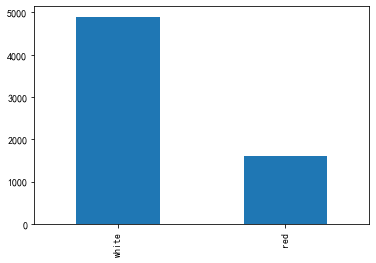

In [33]:
wines.wine_type.value_counts().plot(kind='bar')

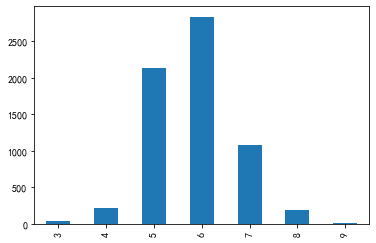

In [34]:
wines.quality.value_counts().sort_index().plot(kind='bar')

In [6]:
#3-5,6\7,8\9\10
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low' 
                                                          if value <= 5 else 'medium' 
                                                          if value <= 7 else 'high')
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'], 
                                           categories=['low', 'medium', 'high'])
white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low' 
                                                              if value <= 5 else 'medium' 
                                                              if value <= 7 else 'high')
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'], 
                                             categories=['low', 'medium', 'high'])

wines = pd.concat([red_wine, white_wine])

# 打乱数据集
wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)

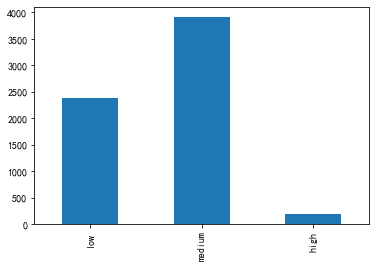

In [36]:
wines.quality_label.value_counts().sort_index().plot(kind='bar')

In [37]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         6497 non-null   float64 
 1   volatile acidity      6497 non-null   float64 
 2   citric acid           6497 non-null   float64 
 3   residual sugar        6497 non-null   float64 
 4   chlorides             6497 non-null   float64 
 5   free sulfur dioxide   6497 non-null   float64 
 6   total sulfur dioxide  6497 non-null   float64 
 7   density               6497 non-null   float64 
 8   pH                    6497 non-null   float64 
 9   sulphates             6497 non-null   float64 
 10  alcohol               6497 non-null   float64 
 11  quality               6497 non-null   int64   
 12  wine_type             6497 non-null   object  
 13  quality_label         6497 non-null   category
dtypes: category(1), float64(11), int64(1), object(1)
memory 

In [38]:
wines.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.17         0.74            12.8      0.045   
1            7.7              0.64         0.21             2.2      0.077   
2            6.8              0.39         0.34             7.4      0.020   
3            6.3              0.28         0.47            11.2      0.040   
4            7.4              0.35         0.20            13.9      0.054   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 24.0                 126.0  0.99420  3.26       0.38   
1                 32.0                 133.0  0.99560  3.27       0.45   
2                 38.0                 133.0  0.99212  3.18       0.44   
3                 61.0                 183.0  0.99592  3.12       0.51   
4                 63.0                 229.0  0.99888  3.11       0.50   

   alcohol  quality wine_type quality_label  
0     12.2        8     white          high  
1      9.9        5       red           low  
2     12.0        7     white        medium  
3      9.5        6     white        medium  
4      8.9        6     white        medium

In [39]:
wines.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378  
std       0.160787     0.148806     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

In [7]:
columns = {'fixed acidity': u'固定酸',
           'volatile acidity': u'挥发性酸',
           'citric acid': u'柠檬酸',
           'residual sugar': u'残留糖分',
           'chlorides': u'氯化物',
           'free sulfur dioxide': u'游离二氧化硫',
           'total sulfur dioxide': u'总二氧化硫',
           'density': u'稠密度',
           'pH': u'酸碱度',
           'sulphates': u'硫酸盐',
           'alcohol': u'酒精度'
          }  
red_wine.rename(columns = columns,inplace = True)
white_wine.rename(columns = columns,inplace = True)
wines.rename(columns = columns,inplace = True)

In [8]:
subset_attributes = [u'残留糖分',u'总二氧化硫',u'硫酸盐',u'酒精度',u'挥发性酸','quality']
rs = np.round(red_wine[subset_attributes].describe(),2)
ws = np.round(white_wine[subset_attributes].describe(),2)
pd.concat([rs,ws],axis = 1,keys=[u'红',u'白'])

红                                                     白           \
          残留糖分    总二氧化硫      硫酸盐      酒精度     挥发性酸  quality     残留糖分    总二氧化硫   
count  1599.00  1599.00  1599.00  1599.00  1599.00  1599.00  4898.00  4898.00   
mean      2.54    46.47     0.66    10.42     0.53     5.64     6.39   138.36   
std       1.41    32.90     0.17     1.07     0.18     0.81     5.07    42.50   
min       0.90     6.00     0.33     8.40     0.12     3.00     0.60     9.00   
25%       1.90    22.00     0.55     9.50     0.39     5.00     1.70   108.00   
50%       2.20    38.00     0.62    10.20     0.52     6.00     5.20   134.00   
75%       2.60    62.00     0.73    11.10     0.64     6.00     9.90   167.00   
max      15.50   289.00     2.00    14.90     1.58     8.00    65.80   440.00   

                                           
           硫酸盐      酒精度     挥发性酸  quality  
count  4898.00  4898.00  4898.00  4898.00  
mean      0.49    10.51     0.28     5.88  
std       0.11     1.23     0.10     0.89  
min       0.22     8.00     0.08     3.00  
25%       0.41     9.50     0.21     5.00  
50%       0.47    10.40     0.26     6.00  
75%       0.55    11.40     0.32     6.00  
max       1.08    14.20     1.10     9.00

In [42]:
subset_attributes = [u'酒精度',u'挥发性酸',u'酸碱度','quality']
ls = np.round(wines[wines['quality_label']=='low'][subset_attributes].describe(),2)
ms = np.round(wines[wines['quality_label']=='medium'][subset_attributes].describe(),2)
hs = np.round(wines[wines['quality_label']=='high'][subset_attributes].describe(),2)
pd.concat([ls,ms,hs],axis = 1,keys=[u'低',u'中',u'高'])

低                                   中                             \
           酒精度     挥发性酸      酸碱度  quality      酒精度     挥发性酸      酸碱度  quality   
count  2384.00  2384.00  2384.00  2384.00  3915.00  3915.00  3915.00  3915.00   
mean      9.87     0.40     3.21     4.88    10.81     0.31     3.22     6.28   
std       0.84     0.19     0.16     0.36     1.20     0.14     0.16     0.45   
min       8.00     0.10     2.74     3.00     8.40     0.08     2.72     6.00   
25%       9.30     0.26     3.11     5.00     9.80     0.21     3.11     6.00   
50%       9.60     0.34     3.20     5.00    10.80     0.27     3.21     6.00   
75%      10.40     0.50     3.31     5.00    11.70     0.36     3.33     7.00   
max      14.90     1.58     3.90     5.00    14.20     1.04     4.01     7.00   

            高                          
          酒精度    挥发性酸     酸碱度 quality  
count  198.00  198.00  198.00  198.00  
mean    11.69    0.29    3.23    8.03  
std      1.27    0.12    0.16    0.16  
min      8.50    0.12    2.88    8.00  
25%     11.00    0.21    3.13    8.00  
50%     12.00    0.28    3.23    8.00  
75%     12.60    0.35    3.33    8.00  
max     14.00    0.85    3.72    9.00

Text(0, 0.5, 'Wine 酸碱度 %')

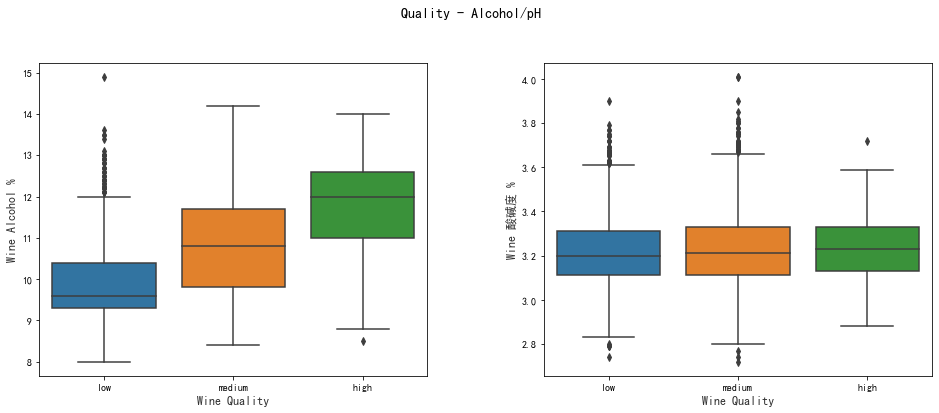

In [43]:
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(16, 6))
f.suptitle(u'Quality - Alcohol/pH', fontsize=14)
f.subplots_adjust(top= 0.85,wspace=0.3)
sns.boxplot(x="quality_label", y=u"酒精度", data=wines,ax=ax1)
ax1.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax1.set_ylabel("Wine Alcohol %",size = 12,alpha=0.8)
sns.boxplot(x="quality_label", y=u"酸碱度", data=wines,ax=ax2)
ax2.set_xlabel("Wine Quality",size = 12,alpha=0.8)
ax2.set_ylabel(u"Wine 酸碱度 %",size = 12,alpha=0.8)

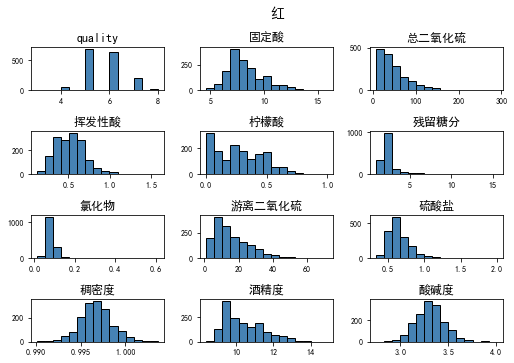

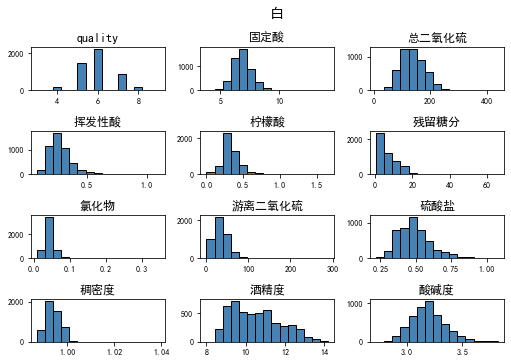

In [44]:
red_wine.hist(bins=15,color='steelblue', edgecolor='black', linewidth=1.0,xlabelsize=8, ylabelsize=8,grid=False)
plt.tight_layout(rect=(0,0, 1.2, 1.2))
rt = plt.suptitle(u'红',x=0.65,y=1.25,fontsize=14)

white_wine.hist(bins=15,color='steelblue', edgecolor='black', linewidth=1.0,xlabelsize=8, ylabelsize=8,grid=False)
plt.tight_layout(rect=(0,0, 1.2, 1.2))
rt = plt.suptitle(u'白',x=0.65,y=1.25,fontsize=14)

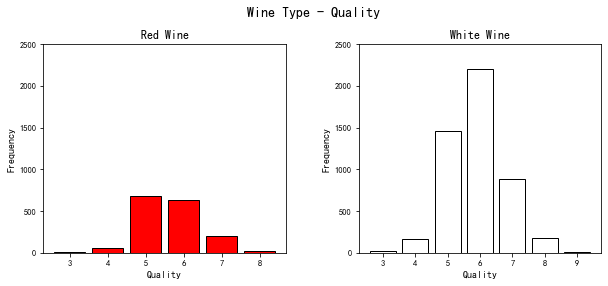

In [9]:
fig = plt.figure(figsize = (10, 4))
title = fig.suptitle("Wine Type - Quality", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

ax1 = fig.add_subplot(1,2, 1)
ax1.set_title("Red Wine")
ax1.set_xlabel("Quality")
ax1.set_ylabel("Frequency") 
rw_q = red_wine['quality'].value_counts()
rw_q = (list(rw_q.index), list(rw_q.values))
ax1.set_ylim([0, 2500])
ax1.tick_params(axis='both', which='major', labelsize=8.5)
bar1 = ax1.bar(rw_q[0], rw_q[1], color='red',edgecolor='black', linewidth=1)

ax2 = fig.add_subplot(1,2, 2)
ax2.set_title("White Wine")
ax2.set_xlabel("Quality")
ax2.set_ylabel("Frequency") 
ww_q = white_wine['quality'].value_counts()
ww_q = (list(ww_q.index), list(ww_q.values))
ax2.set_ylim([0, 2500])
ax2.tick_params(axis='both', which='major', labelsize=8.5)
bar2 = ax2.bar(ww_q[0], ww_q[1], color='white',edgecolor='black', linewidth=1)

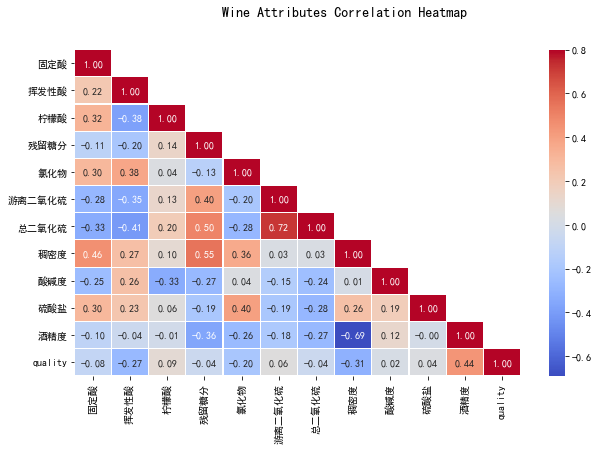

In [10]:
f, ax = plt.subplots(figsize=(10, 6))
corr = wines.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False#不显示右上角矩阵
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',mask=mask,linewidths=.05,vmax=.8)
t= f.suptitle('Wine Attributes Correlation Heatmap', fontsize=14)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


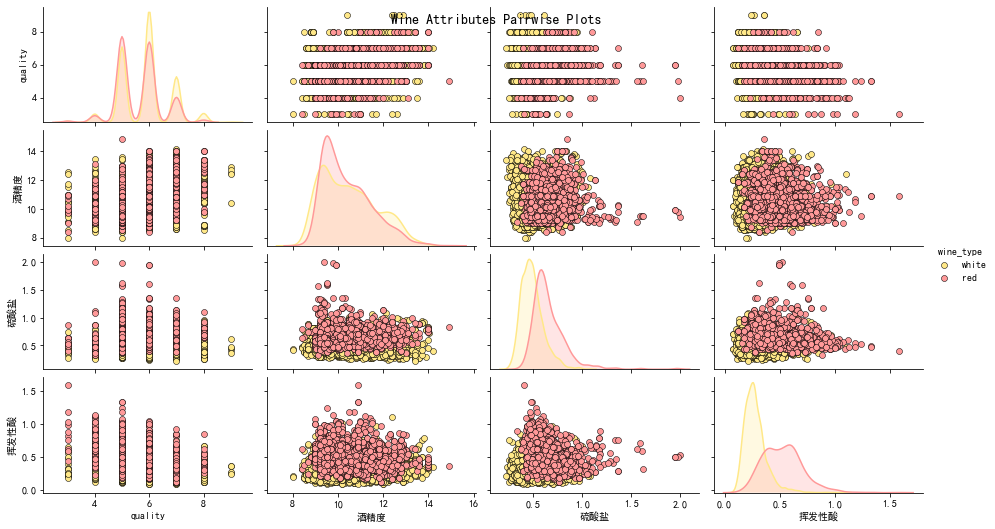

In [47]:
#散点图
cols = ['wine_type', 'quality', u'酒精度', u'硫酸盐', u'挥发性酸',u'quality_label']
pp = sns.pairplot(wines[cols], hue='wine_type', size=1.8, aspect=1.8, 
                  palette={"red": "#FF9999", "white": "#FFE888"},
                  plot_kws=dict(edgecolor="black", linewidth=0.5))
fig = pp.fig 
t = fig.suptitle('Wine Attributes Pairwise Plots', fontsize=14)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2272: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2272: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


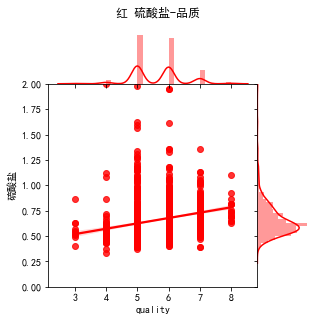

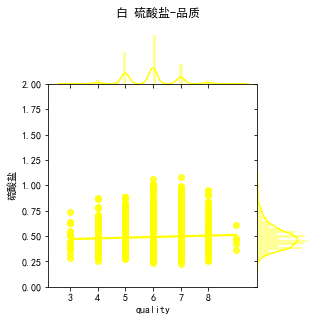

In [11]:
#jointplot研究相关关系
rj = sns.jointplot(x='quality', y=u'硫酸盐', data=red_wine,kind='reg',ylim=(0,2),color='red',
                   space=0, size=4.5, ratio=4)
rj.ax_joint.set_xticks(list(range(3,9)))
fig = rj.fig
fig.subplots_adjust(top=0.9)
t = fig.suptitle(u'红 硫酸盐-品质',fontsize=12)

wj = sns.jointplot(x='quality', y=u'硫酸盐', data=white_wine,kind='reg',ylim=(0,2),color='yellow',
                   space=0, size=4.5, ratio=4)
wj.ax_joint.set_xticks(list(range(3,9)))
fig = wj.fig
fig.subplots_adjust(top=0.9)
t = fig.suptitle(u'白 硫酸盐-品质',fontsize=12)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


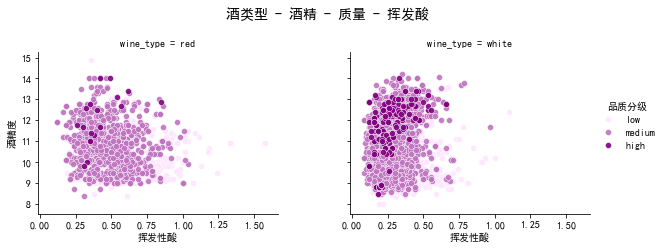

In [49]:
g = sns.FacetGrid(wines, col="wine_type", hue='quality_label',col_order=['red', 'white'],
                  hue_order=['low', 'medium', 'high'],aspect=1.2, size=3.5,
                  palette=sns.light_palette('purple',3))
g.map(plt.scatter,u"挥发性酸",u"酒精度", alpha=0.9,edgecolor='white', linewidth=0.5)
fig = g.fig 
fig.subplots_adjust(top=0.8, wspace=0.3)
fig.suptitle(u'酒类型 - 酒精 - 质量 - 挥发酸', fontsize=14)
l = g.add_legend(title=u'品质分级')

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler #标准化
from sklearn.preprocessing import LabelEncoder

In [13]:
#二分类，预测红白
wtp_features = wines.iloc[:,:-3]
wtp_feature_names = wtp_features.columns
wtp_class_labels = np.array(wines['wine_type'])

wtp_train_X, wtp_test_X, wtp_train_y, wtp_test_y = train_test_split(wtp_features, wtp_class_labels, 
                                                                    test_size=0.3, random_state=42)

In [14]:
wtp_ss = StandardScaler().fit(wtp_train_X)

wtp_train_SX = wtp_ss.transform(wtp_train_X)

wtp_test_SX = wtp_ss.transform(wtp_test_X)

In [15]:
#LR分类
from sklearn.linear_model import LogisticRegression

wtp_lr = LogisticRegression()
wtp_lr.fit(wtp_train_SX, wtp_train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
wtp_lr_predictions = wtp_lr.predict(wtp_test_SX)
import model_evaluation_utils as meu
meu.display_model_performance_metrics(true_labels=wtp_test_y, predicted_labels=wtp_lr_predictions, 
                                      classes=['red', 'white'])

Model Performance metrics:
------------------------------
Accuracy: 0.9928
Precision: 0.9928
Recall: 0.9928
F1 Score: 0.9928

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         red       0.99      0.99      0.99       470
       white       1.00      1.00      1.00      1480

    accuracy                           0.99      1950
   macro avg       0.99      0.99      0.99      1950
weighted avg       0.99      0.99      0.99      1950


Prediction Confusion Matrix:
------------------------------


TypeError: __new__() got an unexpected keyword argument 'labels'

In [18]:
#深度学习
le = LabelEncoder()
le.fit(wtp_train_y)

wtp_train_ey = le.transform(wtp_train_y)
wtp_test_ey = le.transform(wtp_test_y)

conda install --channel https://mirrors.tuna.tsinghua.edu.cn/anaconda/cloud/conda-forge/ keras tensorflow

In [20]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

wtp_dnn_model = Sequential()
wtp_dnn_model.add(Dense(16, activation='relu', input_shape=(11,)))
wtp_dnn_model.add(Dense(16, activation='relu'))
wtp_dnn_model.add(Dense(16, activation='relu'))
wtp_dnn_model.add(Dense(1, activation='sigmoid'))

wtp_dnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Using TensorFlow backend.


In [21]:
history = wtp_dnn_model.fit(wtp_train_SX, wtp_train_ey, epochs=10, batch_size=5, 
                            shuffle=True, validation_split=0.1, verbose=1)

Train on 4092 samples, validate on 455 samples
Epoch 1/10
4092/4092 [==============================] - 1s 291us/step - loss: 0.1223 - accuracy: 0.9626 - val_loss: 0.0159 - val_accuracy: 0.9934
Epoch 2/10
4092/4092 [==============================] - 1s 203us/step - loss: 0.0319 - accuracy: 0.9932 - val_loss: 0.0088 - val_accuracy: 0.9978
Epoch 3/10
4092/4092 [==============================] - 1s 200us/step - loss: 0.0261 - accuracy: 0.9936 - val_loss: 0.0066 - val_accuracy: 1.0000
Epoch 4/10
4092/4092 [==============================] - 1s 203us/step - loss: 0.0222 - accuracy: 0.9954 - val_loss: 0.0046 - val_accuracy: 1.0000
Epoch 5/10
4092/4092 [==============================] - 1s 232us/step - loss: 0.0179 - accuracy: 0.9968 - val_loss: 0.0034 - val_accuracy: 1.0000
Epoch 6/10
4092/4092 [==============================] - 1s 204us/step - loss: 0.0163 - accuracy: 0.9966 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 7/10
4092/4092 [==============================] - 1s 203us/step - loss:

In [22]:
wtp_dnn_ypred = wtp_dnn_model.predict_classes(wtp_test_SX)
wtp_dnn_predictions = le.inverse_transform(wtp_dnn_ypred) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:289: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


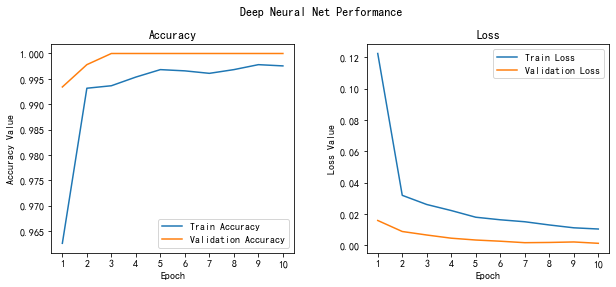

In [23]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
t = f.suptitle('Deep Neural Net Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

epochs = list(range(1,11))
#print(history.history)
ax1.plot(epochs, history.history['accuracy'],label='Train Accuracy')
ax1.plot(epochs, history.history['val_accuracy'],label='Validation Accuracy')
ax1.set_xticks(epochs)
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epochs, history.history['loss'], label='Train Loss')
ax2.plot(epochs, history.history['val_loss'], label='Validation Loss')
ax2.set_xticks(epochs)
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

In [24]:
meu.display_model_performance_metrics(true_labels=wtp_test_y, predicted_labels=wtp_dnn_predictions, 
                                      classes=['red','white'])

Model Performance metrics:
------------------------------
Accuracy: 0.9949
Precision: 0.9949
Recall: 0.9949
F1 Score: 0.9949

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         red       0.99      0.99      0.99       470
       white       1.00      1.00      1.00      1480

    accuracy                           0.99      1950
   macro avg       0.99      0.99      0.99      1950
weighted avg       0.99      0.99      0.99      1950


Prediction Confusion Matrix:
------------------------------


TypeError: __new__() got an unexpected keyword argument 'labels'

[11/11] features ████████████████████ Time elapsed: 0 seconds

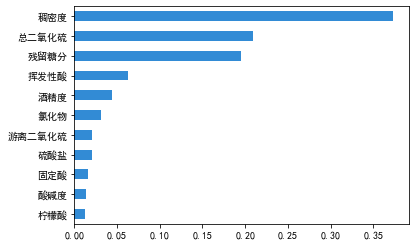

In [60]:
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel

wtp_interpreter = Interpretation(wtp_test_SX, feature_names=wtp_features.columns)
wtp_im_model = InMemoryModel(wtp_lr.predict_proba, examples=wtp_train_SX, target_names=wtp_lr.classes_)
plots = wtp_interpreter.feature_importance.plot_feature_importance(wtp_im_model, ascending=False)

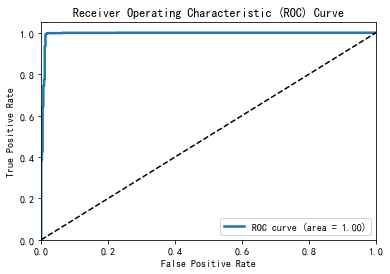

In [63]:
import model_evaluation_utils as meu
meu.plot_model_roc_curve(wtp_lr, wtp_test_SX, wtp_test_y)#ROC曲线

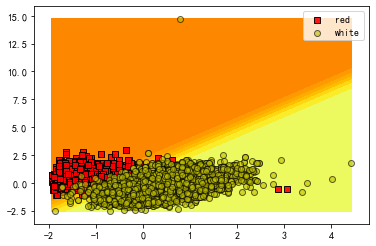

In [56]:
feature_indices = [i for i, feature in enumerate(wtp_feature_names) 
                       if feature in [u'稠密度', u'总二氧化硫']]
meu.plot_model_decision_surface(clf=wtp_lr, train_features=wtp_train_SX[:, feature_indices], 
                                train_labels=wtp_train_y, plot_step=0.02, cmap=plt.cm.Wistia_r,
                                markers=[',', 'o'], alphas=[0.9, 0.6], colors=['r', 'y'])

In [64]:
#品质预测
wqp_features = wines.iloc[:,:-3]
wqp_class_labels = np.array(wines['quality_label'])
wqp_label_names = ['low', 'medium', 'high']
wqp_feature_names = list(wqp_features.columns)
wqp_train_X, wqp_test_X, wqp_train_y, wqp_test_y = train_test_split(wqp_features, wqp_class_labels, 
                                                                    test_size=0.3, random_state=42)


In [65]:
wqp_ss = StandardScaler().fit(wqp_train_X)

wqp_train_SX = wqp_ss.transform(wqp_train_X)

wqp_test_SX = wqp_ss.transform(wqp_test_X)


In [66]:
from sklearn.tree import DecisionTreeClassifier
#决策树
wqp_dt = DecisionTreeClassifier()
wqp_dt.fit(wqp_train_SX, wqp_train_y)

wqp_dt_predictions = wqp_dt.predict(wqp_test_SX)

#meu.display_model_performance_metrics(true_labels=wqp_test_y, predicted_labels=wqp_dt_predictions, 
#                                      classes=wqp_label_names)

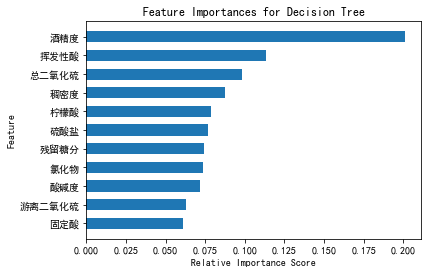

In [67]:
wqp_dt_feature_importances = wqp_dt.feature_importances_
wqp_dt_feature_names, wqp_dt_feature_scores = zip(*sorted(zip(wqp_feature_names, wqp_dt_feature_importances), 
                                                          key=lambda x: x[1]))
y_position = list(range(len(wqp_dt_feature_names)))
plt.barh(y_position, wqp_dt_feature_scores, height=0.6, align='center')
plt.yticks(y_position , wqp_dt_feature_names)
plt.xlabel('Relative Importance Score')
plt.ylabel('Feature')
t = plt.title('Feature Importances for Decision Tree')

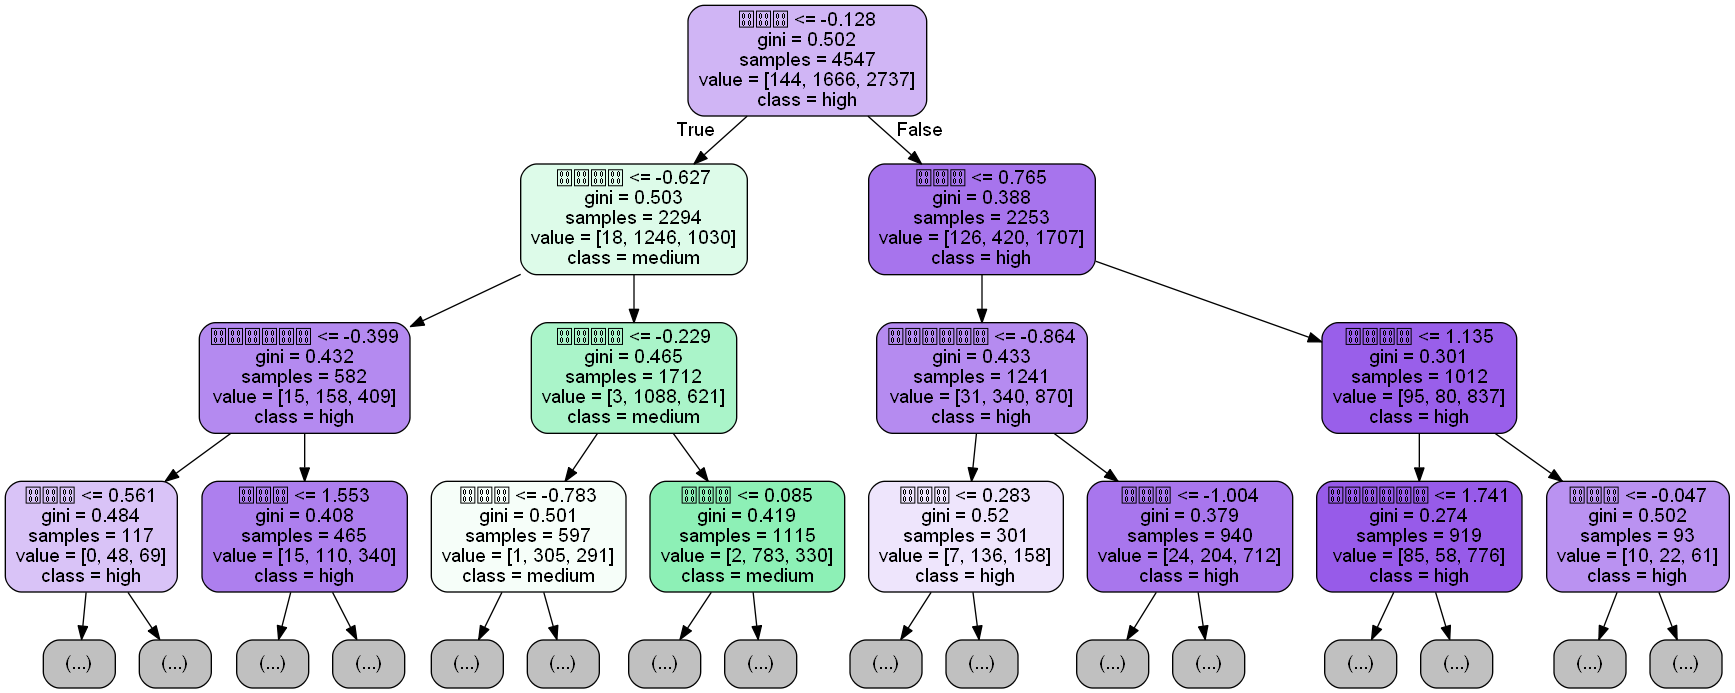

In [68]:
from graphviz import Source#画出决策树
from sklearn import tree
from IPython.display import Image

graph = Source(tree.export_graphviz(wqp_dt, out_file=None, class_names=wqp_label_names,
                                    filled=True, rounded=True, special_characters=False,
                                    feature_names=wqp_feature_names, max_depth=3))
png_data = graph.pipe(format='png')
with open('dtree_structure.png','wb') as f:
    f.write(png_data)

Image(png_data)

In [72]:
from sklearn.ensemble import RandomForestClassifier#随机森林分类
# train the model
wqp_rf = RandomForestClassifier()
wqp_rf.fit(wqp_train_SX, wqp_train_y)
# predict and evaluate performance
wqp_rf_predictions = wqp_rf.predict(wqp_test_SX)
meu.display_model_performance_metrics(true_labels=wqp_test_y, predicted_labels=wqp_rf_predictions, 
                                      classes=wqp_label_names)

Model Performance metrics:
------------------------------
Accuracy: 0.8072
Precision: 0.8088
Recall: 0.8072
F1 Score: 0.8015

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         low       0.79      0.72      0.75       718
      medium       0.81      0.88      0.85      1178
        high       0.94      0.28      0.43        54

    accuracy                           0.81      1950
   macro avg       0.85      0.63      0.68      1950
weighted avg       0.81      0.81      0.80      1950


Prediction Confusion Matrix:
------------------------------


TypeError: __new__() got an unexpected keyword argument 'labels'

In [70]:
print(wqp_rf.get_params())

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


In [73]:
from sklearn.model_selection import GridSearchCV
#对n_estimators和max_features进行调优——多少颗决策树，以及用多少特征
param_grid = {
                'n_estimators': [100, 200, 300, 500], 
                'max_features': ['auto', None, 'log2']    
              }

wqp_clf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5,
                       scoring='accuracy')
wqp_clf.fit(wqp_train_SX, wqp_train_y)
print(wqp_clf.best_params_)

{'max_features': 'auto', 'n_estimators': 500}


In [74]:
results = wqp_clf.cv_results_
for param, score_mean, score_sd in zip(results['params'], results['mean_test_score'], results['std_test_score']):
    print(param, round(score_mean, 4), round(score_sd, 4))

{'max_features': 'auto', 'n_estimators': 100} 0.7898 0.0088
{'max_features': 'auto', 'n_estimators': 200} 0.7865 0.0085
{'max_features': 'auto', 'n_estimators': 300} 0.7876 0.0085
{'max_features': 'auto', 'n_estimators': 500} 0.7906 0.0083
{'max_features': None, 'n_estimators': 100} 0.7876 0.0122
{'max_features': None, 'n_estimators': 200} 0.7882 0.0096
{'max_features': None, 'n_estimators': 300} 0.7867 0.0101
{'max_features': None, 'n_estimators': 500} 0.7854 0.0107
{'max_features': 'log2', 'n_estimators': 100} 0.7898 0.0088
{'max_features': 'log2', 'n_estimators': 200} 0.7865 0.0085
{'max_features': 'log2', 'n_estimators': 300} 0.7876 0.0085
{'max_features': 'log2', 'n_estimators': 500} 0.7906 0.0083


In [77]:
wqp_rf = RandomForestClassifier(n_estimators=200,max_features='auto',random_state=42)
wqp_rf.fit(wqp_train_SX, wqp_train_y)

wqp_rf_predictions = wqp_rf.predict(wqp_test_SX)
meu.display_model_performance_metrics(true_labels=wqp_test_y, predicted_labels=wqp_rf_predictions, 
                                      classes=wqp_label_names)

Model Performance metrics:
------------------------------
Accuracy: 0.8103
Precision: 0.8109
Recall: 0.8103
F1 Score: 0.8047

Model Classification report:
------------------------------
              precision    recall  f1-score   support

         low       0.80      0.73      0.76       718
      medium       0.82      0.89      0.85      1178
        high       0.88      0.28      0.42        54

    accuracy                           0.81      1950
   macro avg       0.83      0.63      0.68      1950
weighted avg       0.81      0.81      0.80      1950


Prediction Confusion Matrix:
------------------------------


TypeError: __new__() got an unexpected keyword argument 'labels'

[11/11] features ████████████████████ Time elapsed: 1 seconds

Text(0, 0.5, '特征')

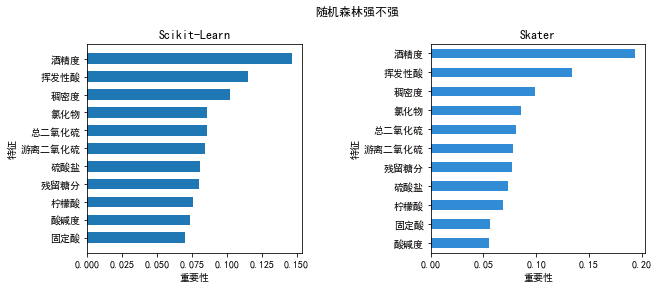

In [81]:
from skater.core.explanations import Interpretation
from skater.model import InMemoryModel

interpreter = Interpretation(wqp_test_SX, feature_names=wqp_feature_names)
wqp_im_model = InMemoryModel(wqp_rf.predict_proba, examples=wqp_train_SX, target_names=wqp_rf.classes_)

wqp_rf_feature_importances = wqp_rf.feature_importances_
wqp_rf_feature_names, wqp_rf_feature_scores = zip(*sorted(zip(wqp_feature_names, wqp_rf_feature_importances), 
                                                          key=lambda x: x[1]))
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
t = f.suptitle(u'随机森林强不强', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.6)
y_position = list(range(len(wqp_rf_feature_names)))
ax1.barh(y_position, wqp_rf_feature_scores, height=0.6, align='center', tick_label=wqp_rf_feature_names)
ax1.set_title("Scikit-Learn")
ax1.set_xlabel(u'重要性')
ax1.set_ylabel(u'特征')
plots = interpreter.feature_importance.plot_feature_importance(wqp_im_model, ascending=False, ax=ax2)
ax2.set_title("Skater")
ax2.set_xlabel(u'重要性')
ax2.set_ylabel(u'特征')

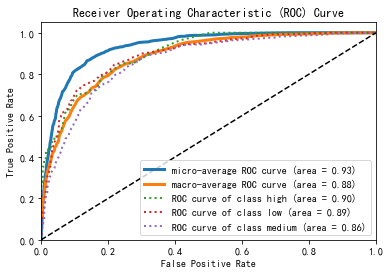

In [82]:
meu.plot_model_roc_curve(wqp_rf, wqp_test_SX, wqp_test_y)

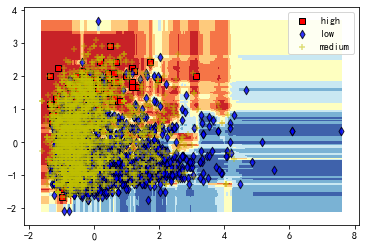

In [85]:
feature_indices = [i for i, feature in enumerate(wqp_feature_names) 
                       if feature in [u'酒精度', u'挥发性酸']]
meu.plot_model_decision_surface(clf=wqp_rf, train_features=wqp_train_SX[:, feature_indices], 
                      train_labels=wqp_train_y, plot_step=0.02, cmap=plt.cm.RdYlBu,
                      markers=[',', 'd', '+'], alphas=[1.0, 0.8, 0.5], colors=['r', 'b', 'y'])


from skater.core.local_interpretation.lime.lime_tabular import LimeTabularExplainer

exp = LimeTabularExplainer(wqp_train_SX, feature_names=wqp_feature_names, 
                           discretize_continuous=True, 
                           class_names=wqp_rf.classes_)



exp.explain_instance(wqp_test_SX[10], wqp_rf.predict_proba, top_labels=1).show_in_notebook() 



exp.explain_instance(wqp_test_SX[747], wqp_rf.predict_proba, top_labels=1).show_in_notebook() 



[81/81] grid cells ████████████████████ Time elapsed: 8 seconds

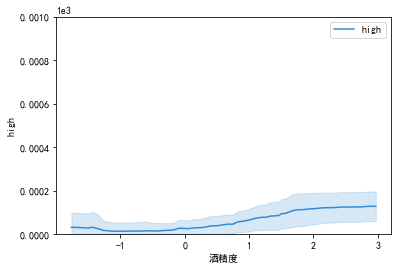

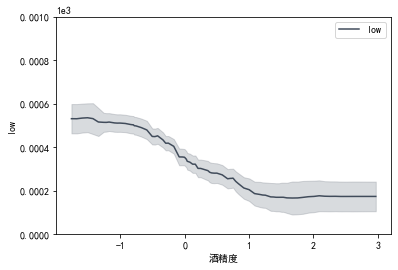

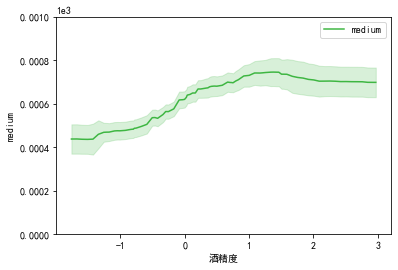

In [86]:
axes_list = interpreter.partial_dependence.plot_partial_dependence([u'酒精度'], wqp_im_model, 
                                                                   grid_resolution=100, 
                                                                   with_variance=True,
                                                                   figsize = (6, 4))
axs = axes_list[0][3:]
[ax.set_ylim(0, 1) for ax in axs];

[4698/4698] grid cells ████████████████████ Time elapsed: 71 seconds

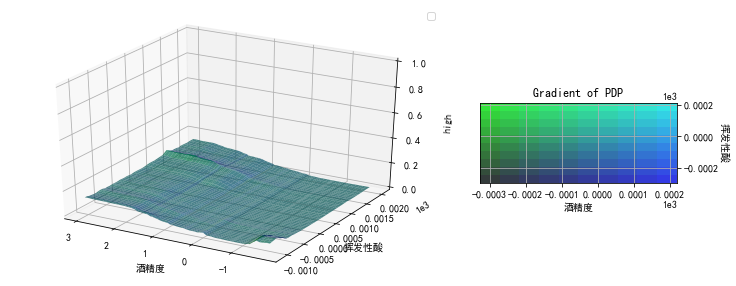

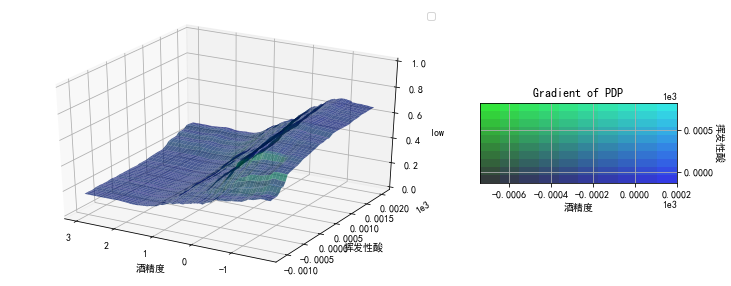

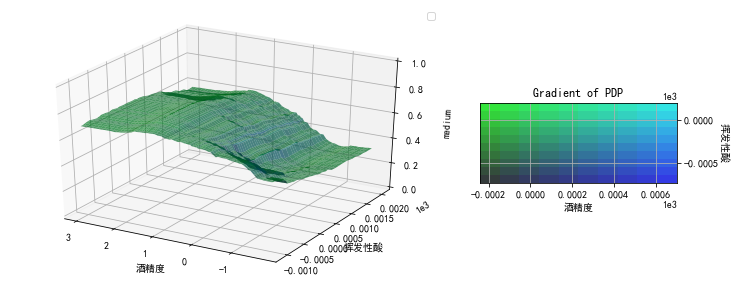

In [87]:
plots_list = interpreter.partial_dependence.plot_partial_dependence([(u'酒精度', u'挥发性酸')], 
                                                                    wqp_im_model, n_samples=1000, figsize=(12, 5),
                                                                    grid_resolution=100)
axs = plots_list[0][3:]
[ax.set_zlim(0, 1) for ax in axs];